# Importing Libraries

In [116]:
import numpy as np
import linearRegression as lR
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Reading data

In [117]:
df = pd.read_excel('AirQualityUCI.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [118]:
df.shape

(9357, 15)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [120]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


# pre-processing

In [121]:
df['Date']=pd.to_datetime(df['Date'],format='%y-%m-%d')
#convert date to readable format

In [122]:
df['Time'] = pd.to_datetime(df['Time'],format= '%H:%M:%S').dt.hour
#convert time to standard format

In [123]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   int64         
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

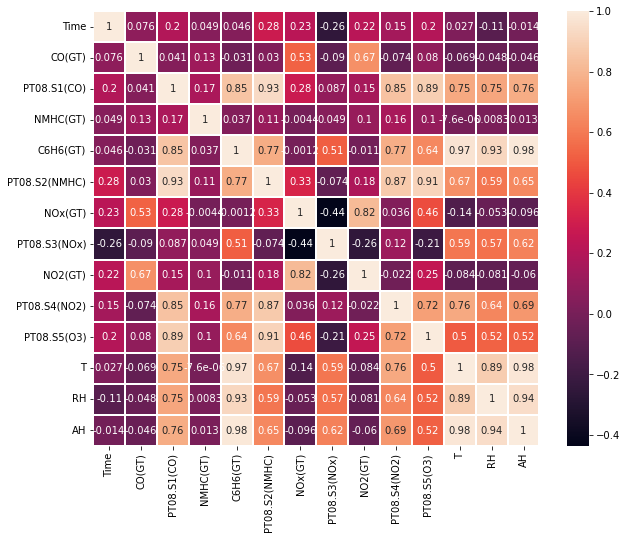

In [125]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=.20)
plt.show()

In [126]:
col_=df.columns.tolist()[1:]
X=df[col_].drop('RH',axis=1)
X=df[col_].drop('Time',axis=1)
y=df['RH'] 

# Standardising and test-train split

In [127]:
ss_x = StandardScaler()
X_std=ss_x.fit_transform(X) 

In [128]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.1, random_state=42)

In [129]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (8421, 13)
Test data size: (936, 13)


In [130]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

# Linear Regression

C:\Users\asjasdraza13\Things doing now\Simultech Project\Assignment 2\linearRegression.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


UnboundLocalError: local variable 'theta' referenced before assignment

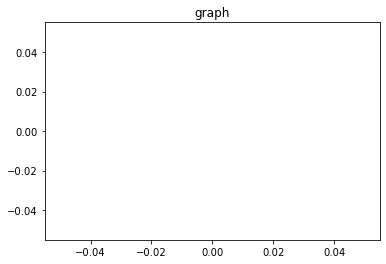

In [144]:
theta = np.matrix([0])
theta= lR.fitGD(X_train,y_train,0.001,0,0,2000)
print(theta)

# Error

In [132]:
m,n=np.shape(X_train)
y_predict_train=np.zeros(m)
b=theta[0]
w=theta[1:]
for i in range(m):
    y_predict_train[i]=np.dot(w,X_train[i])+b
error=0
for i in range(m):
    error=error+(y_predict_train[i]-y_train[i])**2
error=error/(2*m)
print("Training Set error:{}".format(error))

NameError: name 'theta' is not defined

In [133]:
tr=np.shape(X_test)[0]
y_predict_test=np.zeros(tr)
for i in range(tr):
    y_predict_test[i]=np.dot(w,X_test[i])+b
error_test=0
for i in range(tr):
    error_test=error_test+(y_predict_test[i]-y_test[i])**2
error_test=error_test/(2*tr)
print("Test Set error:{}".format(error_test))

NameError: name 'w' is not defined

# Normal equations method

In [140]:
theta_normal=lR.fitNormal(X_train,y_train)
print(theta_normal)

[[-2.57138082e+00  9.72882506e+02  2.14413311e+00 -1.47444445e+03
   1.06085247e+03 -5.49926125e+00 -3.34781910e+02 -6.41968122e+00
  -4.40247881e+02  3.37119350e+02 -6.46505353e+02 -1.07793922e+03
  -1.04056048e+03]
 [-6.52006799e+01  3.83510489e+01  1.68118246e+00  5.55890364e+01
   3.23803541e+01 -1.05582182e+01  3.11514763e+02 -2.83365186e+01
   3.90603746e+01  3.03173931e+01  6.00481548e+01  6.84613444e+01
   6.30833390e+01]
 [-2.01395812e+01  2.35625241e+02  2.82263495e-01  1.37978820e+03
   2.89706344e+02  5.62044669e+02  5.95284868e+02 -4.25526589e+01
   2.10872127e+02  2.81212249e+02 -2.51025937e+04  6.08517649e+03
   4.43603095e+03]
 [ 7.95875296e+01  4.47727763e+01  7.92921777e+00  4.72997721e+01
   3.91445586e+01  7.91142521e+02  5.69308024e+01  3.66792746e+02
   4.23764286e+01  4.19570421e+01  4.66300433e+01  5.51793182e+01
   4.89961553e+01]
 [-9.04646806e+01  4.12015850e+01  2.63016731e+00  6.18413342e+01
   3.02886336e+01 -8.85355555e+00 -4.58511803e+02 -2.46260475e+01


In [138]:
y_predict_train_n=np.zeros(m)
for i in range(m):
    y_predict_train_n[i]=np.dot(theta_normal,X_train[i])
error_n=0
for i in range(m):
    error_n=error_n+(y_predict_train_n[i]-y_train[i])**2
error_n=error_n/(2*m)
print("Training Set error using Normal Equations:{}".format(error_n))

ValueError: setting an array element with a sequence.